# Energy Spectra

A convenience feature for the analysis of quantum systems is a module for
plotting the energy spectrum of a quantum system described by a Hamilton $H$
operator. The energy spectrum itself is the set of eigenvalues $\{e_i\}_i$ as
function of a control parameter $\epsilon$.

As an example application, we study low energy states in two quantum dots,
starting with the Hamiltonian

\begin{equation}
H(\epsilon) = \epsilon \tau_z
\end{equation}

where the control parameter is the detuning $\epsilon$ and $\tau_z$ is the
pauli matrix on the charge space spanned by the basis vectors $\vert L \rangle$
and $\vert R \rangle$.

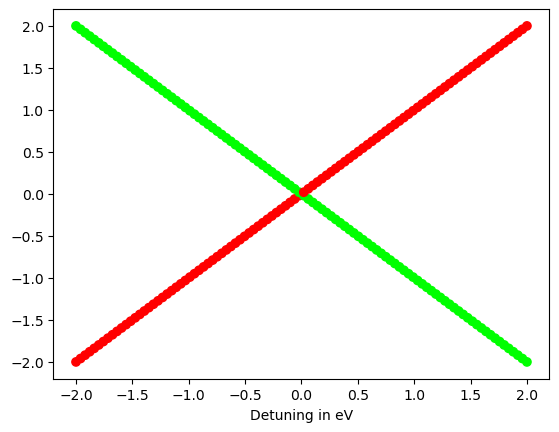

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qopt.matrix import DenseOperator
from qopt.energy_spectrum import plot_energy_spectrum

pauli_z = DenseOperator.pauli_z()
pauli_x = DenseOperator.pauli_x()
detuning_range = np.linspace(-2, 2, 100)
hamiltonians = [eps * pauli_z for eps in detuning_range]

plot_energy_spectrum(hamiltonian=hamiltonians, x_val=detuning_range,
                     x_label='Detuning in eV')
plt.show()

The points mark the eigenvalues of the Hamiltonian and
the colors encode the contribution of the basis states to the eigenvectors. We
observe a crossing without mixing of the eigenvectors. Lets now add a tunnel
coupling $t_c$ to the Hamiltonian:

\begin{equation}
H(\epsilon) = \epsilon \tau_z + t_c \tau_x
\end{equation}

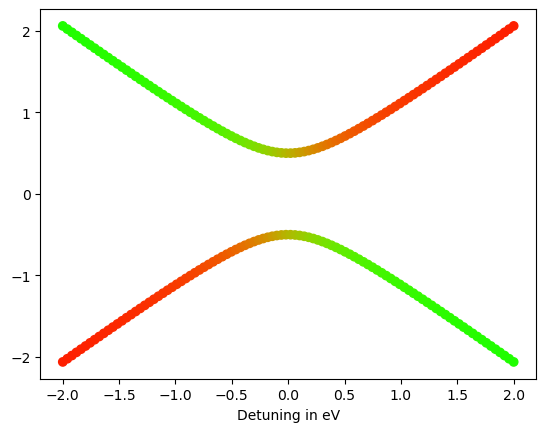

In [2]:
t_c = .5
hamiltonians_tc = [eps * pauli_z + t_c * pauli_x for eps in detuning_range]

plot_energy_spectrum(hamiltonian=hamiltonians_tc, x_val=detuning_range,
                     x_label='Detuning in eV')
plt.show()

Here we observe an avoided crossing around which the eigenvectors are mixing,
shown by the brownish color. Now lets add the spin subspace and introduce a
magnetic field along the quantization axis, resulting in a Zeeman energy $E_z$.

\begin{equation}
H(\epsilon) = \epsilon \tau_z + t_c \tau_x + E_z \sigma_z
\end{equation}

Here $\sigma_z$ denotes the pauli operator on the spin space spanned by the
states $\vert \uparrow \rangle$ and $\vert \downarrow \rangle$. Thus the total
Hilbertspace is the productspace of the charge and spin space.

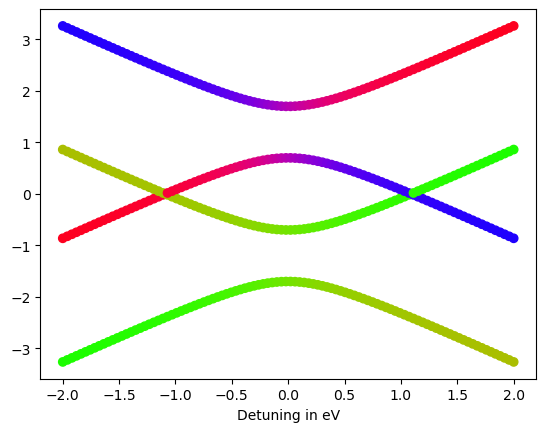

In [3]:
tau_z = pauli_z.kron(pauli_z.identity_like())
tau_x = pauli_x.kron(pauli_x.identity_like())
sigma_z = pauli_x.identity_like().kron(pauli_z)

E_z = 1.2
hamiltonians_tc_E_z = [
    eps * tau_z + t_c * tau_x + E_z * sigma_z
    for eps in detuning_range
]

plot_energy_spectrum(hamiltonians_tc_E_z, x_val=detuning_range,
                     x_label='Detuning in eV')
plt.show()

And we can create two additional avoided crossings, if we include a magnetic
field gradient $B_x$:

\begin{equation}
H(\epsilon) = \epsilon \tau_z + t_c \tau_x + E_z \sigma_z + B_x \sigma_x \tau_z
\end{equation}

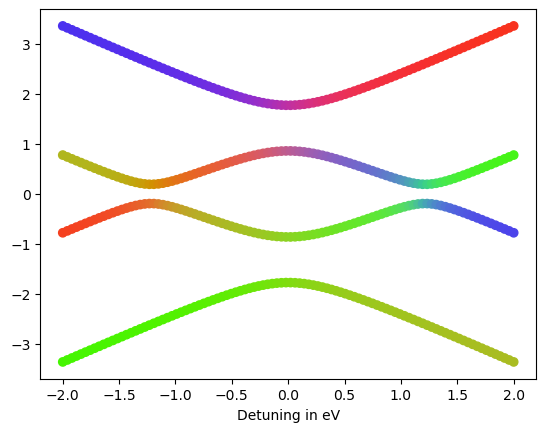

In [4]:
sigma_x = pauli_x.identity_like().kron(pauli_x)

B_x = .5
hamiltonians_tc_E_z_B_x = [
    eps * tau_z + t_c * tau_x + E_z * sigma_z + B_x * sigma_x * tau_z
    for eps in detuning_range
]

plot_energy_spectrum(hamiltonians_tc_E_z_B_x, x_val=detuning_range,
                     x_label='Detuning in eV')
plt.show()